# Week:2 Know your data

### Objective:
The objective of the assignment is to perform statistical analysis on a given data using python libraries and exploratory data analysis using data visualization techniques.

We have to use Fatal Police Shooting Data to answer the questions given in this notebook.

### Fatal Police Shooting Data

**About dataset**\
The dataset consists of following columns
1. **id**                         : unqiue identifier of each victim
2. **name**                       : name of a victim
3. **date**                       : date on fatal shooting 
4. **manner_of_death**            : manner of death classification
    * Shot
    * Shot and Tasered
5. **armed**                      : indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
    * undetermined: it is not known whether or not the victim had a weapon
    * unknown: the victim was armed, but it is not known what the object was
    * unarmed: the victim was not armed
6. **age**                        : age of victim
7. **gender**                     : the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
    * M: Male
    * F: Female
    * None: Unknown
8. **race**                       : race of victim
    * W: White, non-Hispanic
    * B: Black, non-Hispanic
    * A: Asian
    * N: Native American
    * H: Hispanic
    * O: Other
    * None: unknown
9. **city**                       : the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.
10. **state**                     : two-letter postal code abbreviation
11. **signs_of_mental_illness**   : News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.
12. **threat_level**              : These would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats. 
13. **flee**                      : News reports have indicated the victim was moving away from officers
    * Foot
    * Car
    * Not fleeing
14. **body_camera**               : News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

## Let's Begin

In [37]:
# Install the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
import pandas as pd

# Replace 'file_path' with the actual path to your CSV file
file_path = "C:/Users/User/Downloads/week_1_assignment_output.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Now 'df' contains the data from the CSV file

In [39]:
# Check the shape of the dataset
df.shape

(4478, 15)

### Question: 1 (2 Marks)

Display the count of missing values in each column of a dataset

In [40]:
# Q1. Display the count of missing values in each column of a dataset.
print(df.isnull().sum())

id                           0
name                         0
date                         0
manner_of_death              0
armed                      248
age                        169
gender                       5
race                       373
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       179
body_camera                  0
age_categories               0
dtype: int64


### Question: 2 (2 Marks)
Display the outliers present in the age column using IQR method

In [41]:
# Quantile 1 of age column (25 percentage)
Q1 = df['age'].quantile(0.25)
# Quantile 3 of age column (75 percentage)
Q3 =  df['age'].quantile(0.75)

In [42]:
# Inter Quartile Range
IQR = Q3 - Q1
IQR

18.0

In [43]:
# Outliers present in upper case
upper_case = Q3 + (1.5*IQR)
print(upper_case)
# Outliers present in lower case
lower_case = Q1 - (1.5*IQR)
print(lower_case)

72.0
0.0


In [44]:
# Loop through the each data record in the age column and append a data to the outliers list variable
outliers = []
for i in df['age']:
    if (i < lower_case) or (i > upper_case):  # if any data point in the age column less than lower case or any data point greater than upper case will be an outlier
        outliers.append(i)


In [45]:
# print outliers
print(outliers)
print('\ntotal no of outliers are in the set: ', len(outliers))

[75.0, 74.0, 77.0, 83.0, 76.0, 86.0, 76.0, 77.0, 76.0, 76.0, 80.0, 82.0, 86.0, 76.0, 83.0, 73.0, 91.0, 73.0, 79.0, 74.0, 75.0, 82.0, 76.0, 78.0, 84.0, 84.0, 81.0, 89.0, 73.0, 77.0, 76.0, 84.0, 81.0, 80.0, 77.0, 76.0, 74.0, 76.0, 73.0]

total no of outliers are in the set:  39


### Question: 3 (2 Marks) 
Group the year, gender, age categories to check how many victims were harmed

In [46]:
# Create a new column by extracting year from the date column
df['year'] = pd.to_datetime(df['date']).dt.year

In [47]:
grouped_data = df.groupby(['year', 'gender', 'age_categories']).size().reset_index(name='count')
print(grouped_data)

    year gender   age_categories  count
0   2015      F            Adult     18
1   2015      F  Senior citizens      6
2   2015      F          Teenage      5
3   2015      F            Youth     13
4   2015      M            Adult    309
5   2015      M            Child      1
6   2015      M  Senior citizens    166
7   2015      M          Teenage     89
8   2015      M            Youth    387
9   2016      F            Adult     15
10  2016      F            Child      1
11  2016      F  Senior citizens      7
12  2016      F            Youth     17
13  2016      M            Adult    304
14  2016      M  Senior citizens    170
15  2016      M          Teenage     84
16  2016      M            Youth    364
17  2017      F            Adult     12
18  2017      F  Senior citizens      8
19  2017      F          Teenage      5
20  2017      F            Youth     20
21  2017      M            Adult    297
22  2017      M            Child      1
23  2017      M  Senior citizens    179


### Question: 4 (2 Marks )
Generate a bar plot using seaborn and understand the threat levels of different age categories

In [48]:
import warnings

# Suppress FutureWarnings from Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)

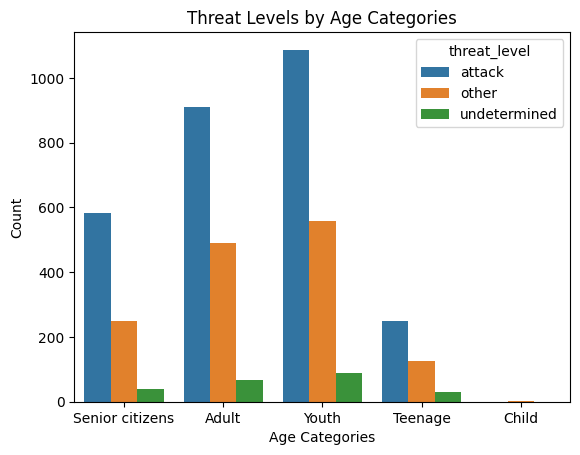

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'threat_level' is a column in your DataFrame
sns.countplot(data=df, x='age_categories', hue='threat_level')
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.title('Threat Levels by Age Categories')

# Remove deprecated warning
for ax in plt.gcf().axes:
    if hasattr(ax.yaxis.get_major_formatter(), 'axis') and ax.yaxis.get_major_formatter().axis == 'both':
        ax.yaxis.set_major_formatter(plt.ScalarFormatter())

plt.show()

### Question: 5 (2 Marks )
Generate a bar plot using seaborn and understand the year wise kills based on victim race

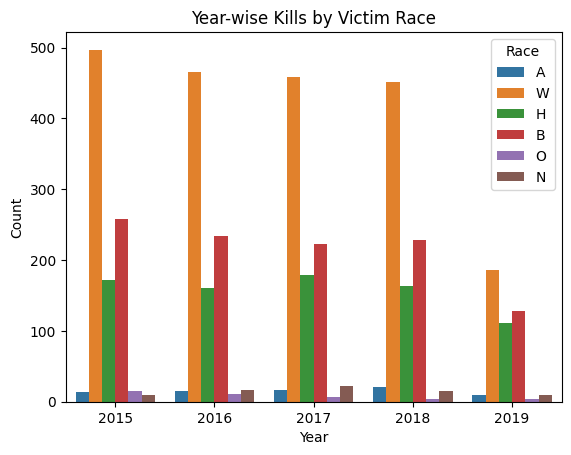

In [50]:
sns.countplot(data=df, x='year', hue='race')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year-wise Kills by Victim Race')
plt.legend(title='Race', loc='upper right')
plt.show()

In [51]:
# Save the data into csv to use for week-3 assignment

In [52]:
# Assuming your DataFrame is named df and you want to save it as 'week_3_assignment.csv'
df.to_csv('week_3_assignment.csv', index=False)


## Thank you!